<p><a href="https://colab.research.google.com/github/ming-zhao/AIML_for_Business/blob/main/Neural_Networks_1.ipynb" target="_blank"><img src="https://camo.githubusercontent.com/f5e0d0538a9c2972b5d413e0ace04cecd8efd828d133133933dfffec282a4e1b/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667" alt="Colab" data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg" style="max-width: 100%;"></a></p>

# Application: Breast Cancer Diagnosis

In this section, we will demonstrate a practical application of neural networks for breast cancer diagnosis using the dataset from Sklearn.

We will start with a comprehensive Exploratory Data Analysis (EDA) to understand the dataset's structure and key characteristics. EDA is a crucial step in the process of model development as it helps identify patterns, anomalies, and insights within the data.

Next, we will build a Deep Neural Network (DNN) to predict the likelihood of breast cancer based on the provided features with the help of AI.

To ensure our model's predictions are interpretable and trustworthy, we will employ several advanced interpretation techniques, including Local Interpretable Model-agnostic Explanations (LIME), SHapley Additive exPlanations (SHAP), and Anchors. These methods will help us dissect the model's decision-making process and provide insights into the importance of different features, thereby enhancing the model's transparency and reliability. Through this comprehensive approach, we aim to highlight the potential of neural networks in improving diagnostic accuracy and emphasize the importance of model interpretability in clinical applications.

## Data Description

The dataset comprises digitized images of fine needle aspirations of breast masses from around 570 patients. Features were computed from these digitized images to describe the characteristics of cell nuclei present in the images. For each cell nucleus, the following 10 features are used to describe its characteristics:

- Radius
- Texture
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Concave points
- Symmetry
- Fractal dimension

For all the nuclei present in an image for a patient, the mean, standard error, and the largest or worst values are computed for each of these 10 features. Therefore, each patient has 30 features in total. 

The input features are continuous, while the target variable is binary, where a malignant case is encoded as 0, and a benign case is encoded as 1.

Given these input features, the goal is to predict whether the cell is benign or malignant and to provide a confidence score to assist doctors in their diagnosis.

The table below shows a sample of the data:

In [3]:
#| label: df_bcd
#| echo: false

import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

# Display the first few rows of the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploratory Data Analysis

To start with EDA, we will use the following prompt

::: {.callout-tip title="Prompt"}

Utilize the breast cancer data in Sklearn to conduct the following analysis:

1). Provide an explanation of the dataset and display the first few rows of the data.

2). Plot the percentage of benign (value 1) and malignant (value 0) cases. Y-axis shows percentage.

3). Generate a plot comparing the distribution of the feature "mean area" for benign and malignant cases. Y-axis shows percentage. Do the same for the feature "worst area".

4). show a correlation plot of input features and the target variable

:::

The dataset contains 569 patient cases and 30 continuous features in total. @fig-hist shows the proportion of cases that are benign and malignant. Out of the 569 cases, 357 of them (roughly 62.7%) are benign, and 212 (roughly 37.3%) are malignant. This indicates that the dataset is skewed, or imbalanced, because there is a disproportionate number of examples or data points for a given class. Most algorithms are designed to minimize error (or maximize accuracy), and they tend to focus on the majority class as it is more convenient for improving overall accuracy.

To recapitulate, consider the following two strategies when dealing with imbalanced datasets:
- Use appropriate performance metrics that emphasize the minority class to evaluate the models.
- Resample the training data by either undersampling the majority class or oversampling the minority class.

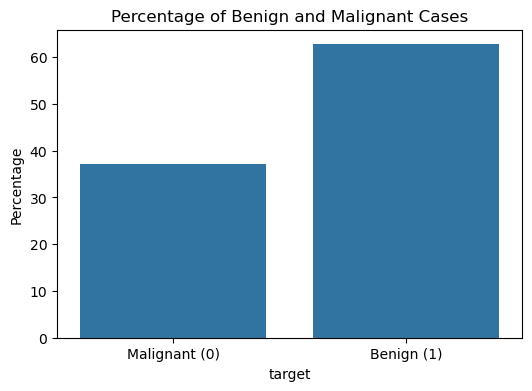

In [1]:
#| label: fig-hist
#| echo: true
#| fig-cap: "Distribution of Benign and Malignant Cases"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

# Calculate the percentage of benign and malignant cases
case_percentage = df['target'].value_counts(normalize=True) * 100

# Plot the percentage
plt.figure(figsize=(6, 4))
sns.barplot(x=case_percentage.index, y=case_percentage.values)
plt.xticks(ticks=[0, 1], labels=['Malignant (0)', 'Benign (1)'])
plt.ylabel('Percentage')
plt.title('Percentage of Benign and Malignant Cases')
plt.show()

In [2]:
#| echo: false

def compare_feature_distribution(feature_name):
    plt.figure(figsize=(8, 5))

    # Select the rows with target 0 (malignant)
    malignant_data = df[df['target'] == 0][feature_name]

    # Select the rows with target 1 (benign)
    benign_data = df[df['target'] == 1][feature_name]

    # Plot the distribution of the specified feature for both benign and malignant cases
    sns.histplot(malignant_data, kde=True, label='Malignant', color='red', alpha=0.5)
    sns.histplot(benign_data, kde=True, label='Benign', color='blue', alpha=0.5)

    plt.xlabel(feature_name)
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {feature_name} for Benign and Malignant Cases')
    plt.legend()
    plt.show()

@fig-mean_area and @fig-worst_area show the distributions of the mean cell area and the worst cell area, respectively. We can observe that if the mean cell area is greater than 750, the case is much more likely to be malignant than benign. Similarly, if the worst or largest cell area is greater than 1,000, the case is much more likely to be malignant. There seems to be a good, albeit weak, separation between the malignant and benign cases when looking at these two features related to cell area.

The purpose of this analysis is to assess how well these features can predict the target variable, i.e., whether a given case is benign or malignant.

::: {.callout-note title="Exercise"}
Use radius and perimeter as features to plot distributional comparison graphs. Consider how these features can be utilized for prediction.
:::

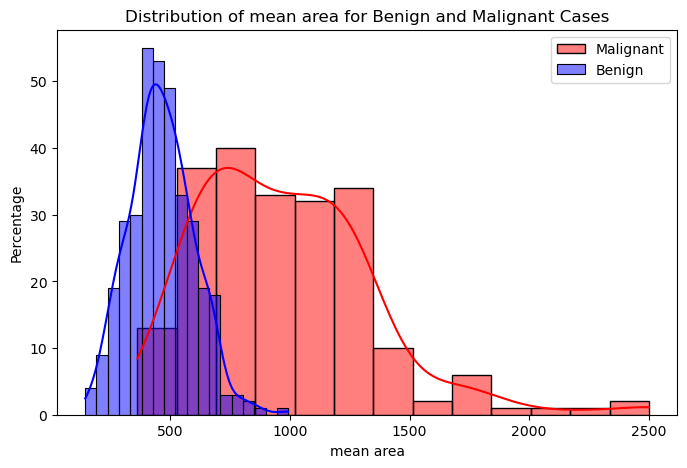

In [3]:
#| label: fig-mean_area
#| echo: true
#| fig-cap: "mean cell area distribution"

compare_feature_distribution('mean area')

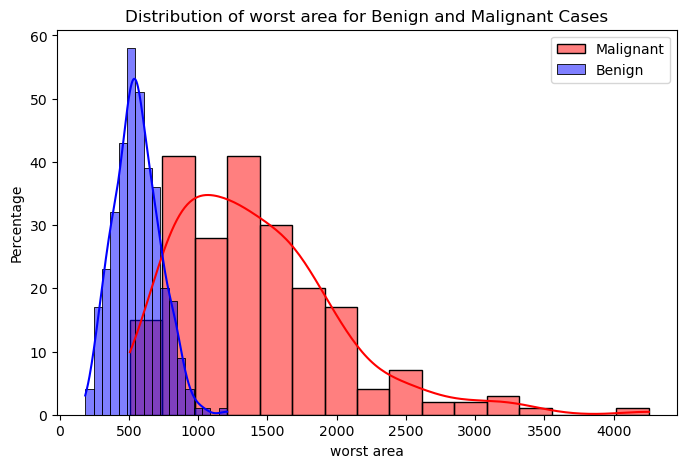

In [4]:
#| label: fig-worst_area
#| echo: true
#| fig-cap: "wrost cell area distribution"

compare_feature_distribution('worst area')

Let’s finally examine how correlated each of the input features are with each other and with the target variable.

::: {.callout-tip collapse="true" title="Correlation Recap"}

The correlation coefficient measures the linear correlation between two variables and has a value between +1 and –1. The magnitude of the coefficient 

- above 0.7 indicates a very high correlation. 
- between 0.5 and 0.7 indicates a moderately high correlation,
- between 0.3 and 0.5 indicates low correlation, and
- less than 0.3 indicates little to no correlation.

:::

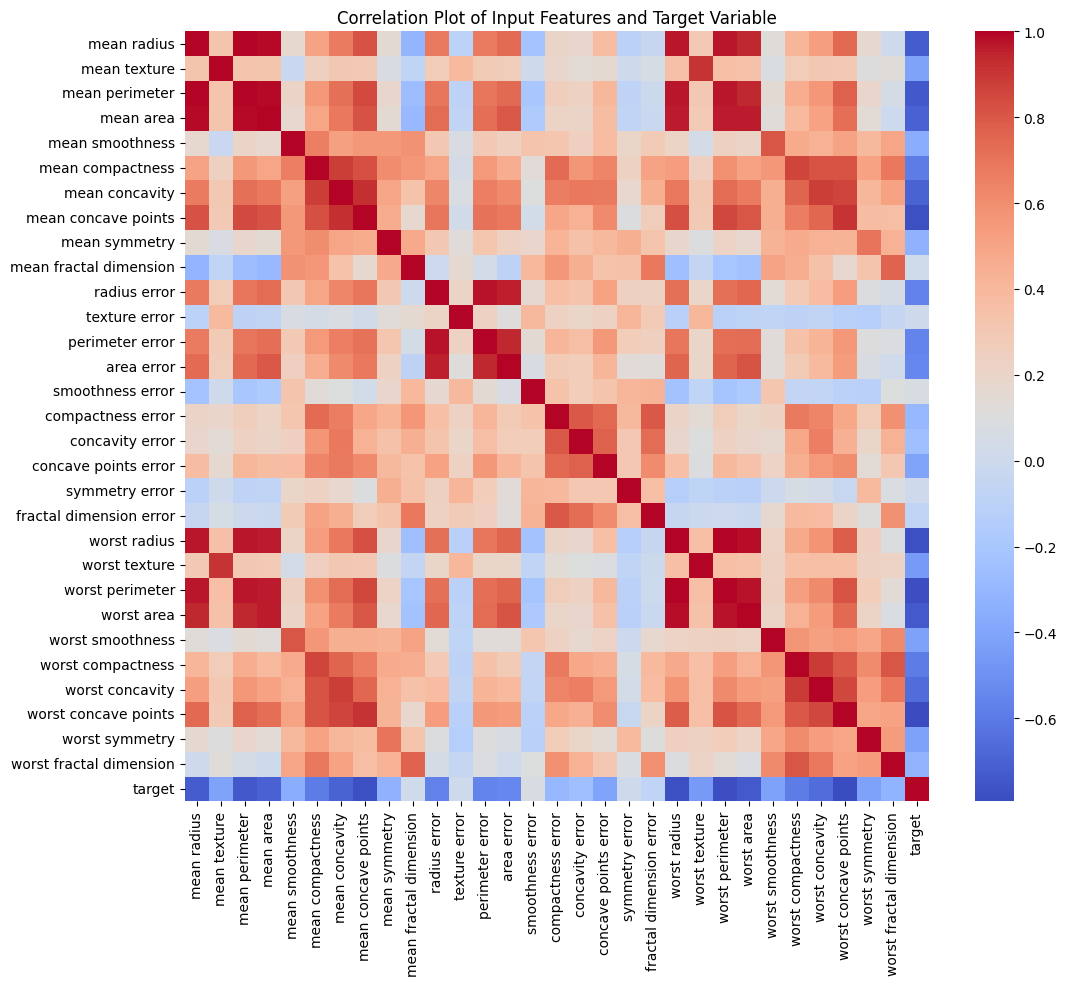

In [5]:
#| label: fig-corr
#| echo: true
#| fig-cap: "correlation plot"

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Input Features and Target Variable')
plt.show()

In the last column of @fig-corr, we can see the correlation of all the input features with the target variable. Features like the mean cell area are highly correlated with the target class. The correlation coefficient is negative, indicating that the larger the value for the feature, the smaller the value for the target variable. This makes sense because the target class has a smaller value (i.e., 0) for the malignant class and a higher value (i.e., 1) for the benign class.

## Build Neural Network

When designing a neural network, there are no fixed rules for choosing the number of hidden layers or the activation functions. These choices often depend on the specific problem, the nature of the data, and the goals of the model.

In this case, we will start building a neural network as suggested in the prompt below. The Sigmoid activation function is chosen for the last layer because our prediction is binary (0 or 1). Besides training and testing data, we also set aside 15% of the data as a validation set to help determine the hyperparameters of the model.


::: {.callout-tip collapse="false" title="Prompt"}

Use a neural network model as follows:

- Layer 1: Linear layer with 30 input features and 20 output features, followed by the ReLU activation function.
  
- Layer 2: Linear layer with 20 input features and 10 output features, followed by the ReLU activation function.

- Layer 3: Linear layer with 10 input features and 5 output features, followed by the ReLU activation function.

- Layer 4: Linear layer with 5 input features and 1 output feature, followed by the Sigmoid activation function.  

to perform prediction on the breast cancer data in SKLearn. Note that 70% of the data is used for training, 15% for validation, and the remaining 15% as the held-out test set.

:::

::: {.callout-caution collapse="false" title="Important Notes"}

1. Besides the training data, we also include 15% of the data as a validation dataset in the training process. The validation dataset provides an independent set of data to evaluate the model's performance during training. This approach ensures that we focus not only on maximizing accuracy on the training data (which could lead to overfitting) but also on maximizing accuracy on the validation data. This helps monitor the model's ability to generalize to unseen data, ensuring it doesn't merely memorize the training data.

4. ChatGPT may standardize the dataset, scaling the input features to a range of 0 to 1. This is an important preprocessing step before training a neural network. However, for the sake of easier model explanation and demonstration, the provided Neural Network code in Google Colab does not perform scaling, which could degrade the model's performance.

:::

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Normalize the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Convert the target labels to a 2D array (required for PyTorch)
y = y.reshape(-1, 1).astype(np.float32)

# Step 2: Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=24)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=24)

# Step 3: Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(30, 20), nn.ReLU())
        self.layer2 = nn.Sequential(nn.Linear(20, 10), nn.ReLU())
        self.layer3 = nn.Sequential(nn.Linear(10, 5), nn.ReLU())
        self.layer4 = nn.Sequential(nn.Linear(5, 1), nn.Sigmoid())

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

# Step 4: Train the model on the training data
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

model = NeuralNetwork()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000
patience = 100
best_val_loss = float('inf')
early_stop_counter = 0

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor).item()

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

# Step 5: Evaluate the model on the test set
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)

# Convert predictions to binary (0 or 1) based on the Sigmoid threshold (0.5)
y_pred_binary = (y_pred_test >= 0.5).int()

# Calculate accuracy on the test set
test_accuracy = torch.mean((y_pred_binary == y_test_tensor).float()).item()
print(f"Test Accuracy: {test_accuracy:.4f}")

Early stopping at epoch 580
Test Accuracy: 0.9302


## Interpret Neural Network

Interpreting neural networks is a challenging task. To make a prediction with a Deep Neural Network (DNN), data is passed through multiple layers, with each layer consisting of numerous units. The inputs to each layer undergo a nonlinear transformation based on the weights and the activation functions used for the units. A single prediction can involve a substantial number of mathematical operations, depending on the structure of the neural network. This complexity renders DNNs as black boxes—it becomes exceedingly difficult to comprehend the transformations occurring at each layer and how the model arrives at its final prediction.

To address the challenge of interpreting such complex models, we need to distinguish between two types of interpretability: global and local.

::: {.callout-note collapse="true" title="Global vs Local Interpretability"}

Global interpretability refers to understanding the overall behavior of a model and how it makes decisions across the entire dataset. For example, in a linear regression model represented as $Y = a_1 X_1 + \cdots a_n X_n$, the coefficients $a_1, \ldots, a_n$ provide clear global interpretability. Each coefficient $a_i$ consistently indicates that for every unit increase in the corresponding feature $X_i$, the target value $Y$ changes by the value of $a_i$. This straightforward relationship applies uniformly across all data points.

However, complex models like neural networks (NNs) often lack global interpretability due to their intricate and non-linear structures, making it challenging to understand their overall decision-making processes.

To address this limitation, we turn to local interpretability, which focuses on individual predictions. Local interpretability explains why a specific prediction was made for a particular instance, providing valuable insights into the decision-making processes of black-box models on a case-by-case basis.
:::


::: {.callout-note collapse="true" title="Example Techniques"}

- LIME (Local Interpretable Model-agnostic Explanations): This technique approximates the complex model with a simple model in the neighborhood of the instance to explain the prediction. 

- SHAP (SHapley Additive exPlanations): SHAP uses Shapley values from cooperative game theory to assign feature importance for individual predictions. 

- Anchors: Anchors are high-precision if-then rules that explain individual predictions.

By leveraging these techniques, we can gain a deeper understanding of how complex models like DNNs make their predictions, thereby enhancing transparency and trust in the model’s decision-making process.
:::

::: {.callout-caution collapse="false" title="Important Notes"}

Although prompts are provided to let ChatGPT interpret the model, ChatGPT does not generate plots, or the plots generated may not be satisfactory. I recommend running the code in Google Colab (click the Google Colab link at the top of this webpage) to view the plots.

:::

In [ ]:
#| echo: false

!pip install lime shap anchor-exp --quiet

### Local Interpretable Model-agnostic Explanations (LIME)

::: {.callout-note collaps="false" title="How it works"}

We use a movie as an example. Suppose a complex model can always predict whether a movie will be a hit or a flop. To understand how it works, you can use LIME as follows:

- Pick a Movie: First, choose a specific movie whose prediction you want to understand.

- Create Similar Examples: Next, create many similar examples by slightly changing different aspects of the movie. For instance, you might change the lead actor, the genre, or the director in these examples.

- Get Predictions for These Examples: Then, ask the model to predict whether each of these slightly different movies will be a hit or a flop.

- See How Changes Affect Predictions: Now, observe how changing different aspects of the movie affects the model's predictions. For example, you might notice that changing the lead actor to someone more famous makes the model more confident that the movie will be a hit.

- Build a Simple Model: Using these observations, build a simpler model (like a set of easy-to-understand rules or a linear regression) that explains the complex model's predictions. This simpler model shows which aspects of the movie are most important for predicting a hit or a flop.

- Identify Important Features: Finally, identify the top features that influenced the prediction. For example, you might find out that the lead actor, the genre, and the director are the most important factors for predicting if a movie will be a hit.

:::


::: {.callout-tip title="Prompt"}

Use the first benign case and the first malignant case in the test dataset to interpret the model's predictions with LIME (Local Interpretable Model-agnostic Explanations) to identify the five most important features contributing to the model's decisions.

:::

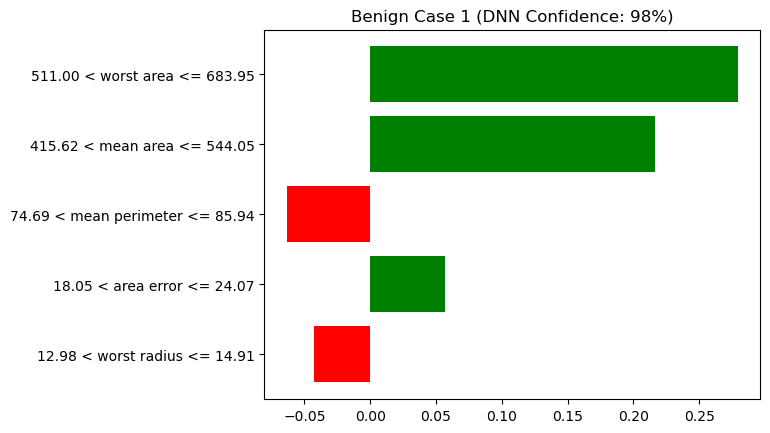

In [23]:
#| label: fig-benign1
#| echo: true
#| fig-cap: "LIME plot for first benign case"

import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Define a custom predict method for the NeuralNetwork class
def prob(data):
    p = model.forward(torch.tensor(data, dtype=torch.float32)).detach().numpy()
    return np.hstack([1 - p, p])

# Define the LIME explainer using the custom predict method
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,
                                                   feature_names=data.feature_names,
                                                   class_names=data.target_names,
                                                   discretize_continuous=True,
                                                   mode='classification')

# Get the first benign case and first malignant case from the test set
benign_instance_index = np.where(y_test == 1)[0][0]
malignant_instance_index = np.where(y_test == 0)[0][0]

instance = X_test[benign_instance_index]

# Explain the first benign case prediction
exp = explainer.explain_instance(instance, prob, num_features=5)
top_features = exp.as_list()

# Display the top 5 important features and their contributions
# print("Top 5 important features and their contributions:")
# for feature, contribution in top_features:
#     print(f"{feature}: {contribution:.4f}")

# Display the plot
fig = exp.as_pyplot_figure()
# plt.title('Benign Case 1 (DNN Confidence: %d%%) | Kernel Width = None (Score: %.2f)' % (prob(instance)[1] * 100, exp.score))
plt.title('Benign Case 1 (DNN Confidence: %d%%)' % (prob(instance)[1] * 100))
plt.show()

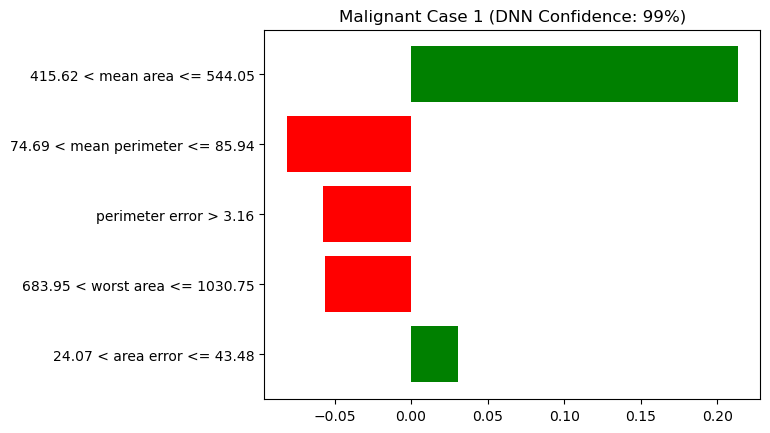

In [20]:
#| label: fig-malignant1
#| echo: true
#| fig-cap: "LIME plot for first malignant case"

instance = X_test[malignant_instance_index]

# Explain the first benign case prediction
exp = explainer.explain_instance(instance, prob, num_features=5)
top_features = exp.as_list()

# Display the plot
fig = exp.as_pyplot_figure()
plt.title('Malignant Case 1 (DNN Confidence: %d%%)' % (prob(instance)[0] * 100))
plt.show()

@fig-benign1 and @fig-malignant1 list the top 5 important features from top to bottom. The figure title shows "(DNN Confidence: X%)", indicating that the DNN model predicted the result (benign or malignant) with a confidence of X%. To understand how it arrived at that prediction, the figure shows the weights or importance of each feature as horizontal bars (red for negative values, green for positive values). On the left side of the figure, there is text in the format lower value < feature name ≤ upper value. According to LIME, the reason the model predicted benign was because the feature values were within these specified ranges.

### SHapley Additive exPlanations (SHAP)

::: {.callout-note collaps="false" title="How it works"}

The method uses concepts from game theory to explain how much each feature contributes to the model's prediction. To explain how the method works, suppose we have a complex model that can predict whether a sports team will win or lose games.

- Pick a Game: First, choose a specific game whose prediction you want to understand.

- Think of Features: The features of the game include players, coach, game location, etc. The goal is to predict whether the team will win or lose based on these features.

- Calculate Contributions: In this context, each feature's contribution to the prediction is calculated. SHAP does this by looking at all possible combinations of features and seeing how adding each feature changes the prediction. This is similar to figuring out how much each player contributes to the team's score, or how important the coach or game location is for winning the game.
  
- Shapley Values: These contributions are called Shapley values. They tell you how much each feature contributed to the model's prediction. A positive Shapley value means the feature pushes the prediction towards "win," while a negative Shapley value means it pushes the prediction towards "lose."

- Summarize the Contributions: SHAP combines all these contributions to explain the model's prediction. It shows which features had the biggest impact on predicting whether the team will win or lose.

:::

::: {.callout-tip title="Prompt"}

Use the first benign case in the test dataset to interpret the model's predictions with SHapley Additive exPlanations to identify the five most important features contributing to the model's decisions.

:::

In [2]:
#| echo: false
#| output: false

import shap
# print the JS visualization code to the notebook
shap.initjs()

# Define a custom predict method for the NeuralNetwork class
def prob(data):
    return model.forward(torch.tensor(data, dtype=torch.float32)).detach().numpy()

shap_explainer = shap.KernelExplainer(prob, X_train, link="logit")
shap_values = shap_explainer.shap_values(X_test, nsamples=100)

Using 398 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/86 [00:00<?, ?it/s]

In [3]:
#| label: fig-shap
#| echo: true
#| fig-cap: "Shap plot for benigh case"

benign_instance_index = np.where(y_test == 1)[0][0]
malignant_instance_index = np.where(y_test == 0)[0][0]

index = benign_instance_index
plot = shap.force_plot(shap_explainer.expected_value[0],
                       shap_values[index,:,0],
                       X_test[index,:],
                       feature_names=data['feature_names'],
                       link="logit")
# shap.save_html('shap.html', plot, full_html=True)
import IPython
IPython.display.HTML('shap.html')

When we explored the data, we observed that roughly 63% of the cases in the dataset were benign. This 0.63 is the base value shown in the SHAP plot, which is the base prediction probability without considering any features. The idea behind the SHAP visualization is to show how the feature values influence the prediction probability, either pushing it up or down from the base value.

As shown in @fig-shap, for this benign instance with mean area = 514 and worst area = 634.3, these features push the probability of being benign towards 0.99. However, because worst radius = 14.42 and mean perimeter = 84.52, these features decrease the probability of being benign.

### Anchors

An anchor is a set of if-conditions. The Anchors method breaks down complex AI decisions into simple rules that we can understand. For example, in @fig-anchor, the Explanation of AI Prediction section shows how AI makes decisions using these simple if-rules. The Example section shows all the conditions that this instance falls under. At the bottom of this figure, there are examples of rules where the AI agent predicts benign and where the AI agent does not predict benign.

In [4]:
#| label: fig-anchor
#| echo: true
#| fig-cap: "anchor plot"

from anchor import anchor_tabular
instance_to_explain = X_test[0]

# Define a custom predict method for the NeuralNetwork class
def pred(data):
    pred = model.forward(torch.tensor(data, dtype=torch.float32)).detach().numpy().reshape(-1) > 0.5
    return np.array([1 if p == True else 0 for p in pred])

# Use Anchor to explain the first case
anchor_explainer = anchor_tabular.AnchorTabularExplainer(
    data.target_names,
    data.feature_names,
    X_train,
    categorical_names={})
exp = anchor_explainer.explain_instance(instance_to_explain,
                                        pred,
                                        threshold=0.95)
# print('Prediction: ', anchor_explainer.class_names[pred(X_test[0])][0])
# print('Anchor: %s' % (' AND '.join(exp.names())))
# print('Precision: %.3f' % exp.precision())
# print('Coverage: %.3f' % exp.coverage())
# exp.save_to_file('anchor.html')

from IPython.display import IFrame
IFrame(src='anchor.html', width=1000, height=300)

# Application: Predicting California Housing

In the previous application, we demonstrated the use of neural networks to tackle classification problems, specifically classifying patients as benign or malignant based on breast cancer diagnosis data. In this section, we shift our focus to using neural networks for regression tasks, specifically predicting California housing prices. As before, we will utilize data from the sklearn library, acknowledging that the dataset is somewhat dated.

Just like in the previous application, we will start by performing exploratory data analysis (EDA) to understand the underlying patterns and characteristics of the dataset. This initial step is crucial as it helps us gain insights into the data, identify any potential issues, and inform our subsequent modeling approach.

## Data Description

::: {.callout-tip title="Prompt"}

Use the California Housing dataset from Sklearn. Display a sample of rows and explain the feature names and target of the data. 

Present fundamental statistics and data visualizations of this dataset, including histograms of the features, a correlation heatmap, and a scatter plot of the feature MedInc against the target.

:::

Feature names and description:
- MedInc: Median income in block group.
  
- HouseAge: Median house age in block group.
  
- AveRooms: Average number of rooms per household.
  
- AveBedrms: Average number of bedrooms per household.
  
- Population: Block group population.
  
- AveOccup: Average number of household members.
  
- Latitude: Block group latitude.
  
- Longitude: Block group longitude.
  
- Target: Median house value in block group (in hundreds of thousands).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Create a Pandas DataFrame for easier data manipulation
df = pd.DataFrame(data=np.c_[X, y], columns=feature_names + ['Target'])

# Display a sample of rows
print("Sample rows of the dataset:")
df.head()

Sample rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Display fundamental statistics
print("\nFundamental Statistics:")
df.describe()


Fundamental Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


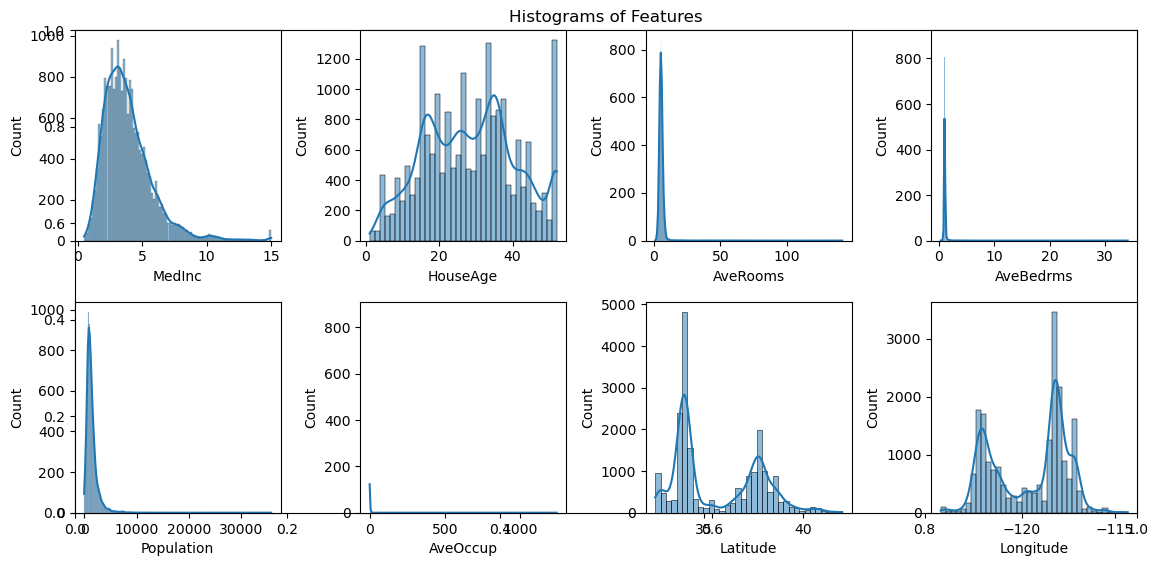

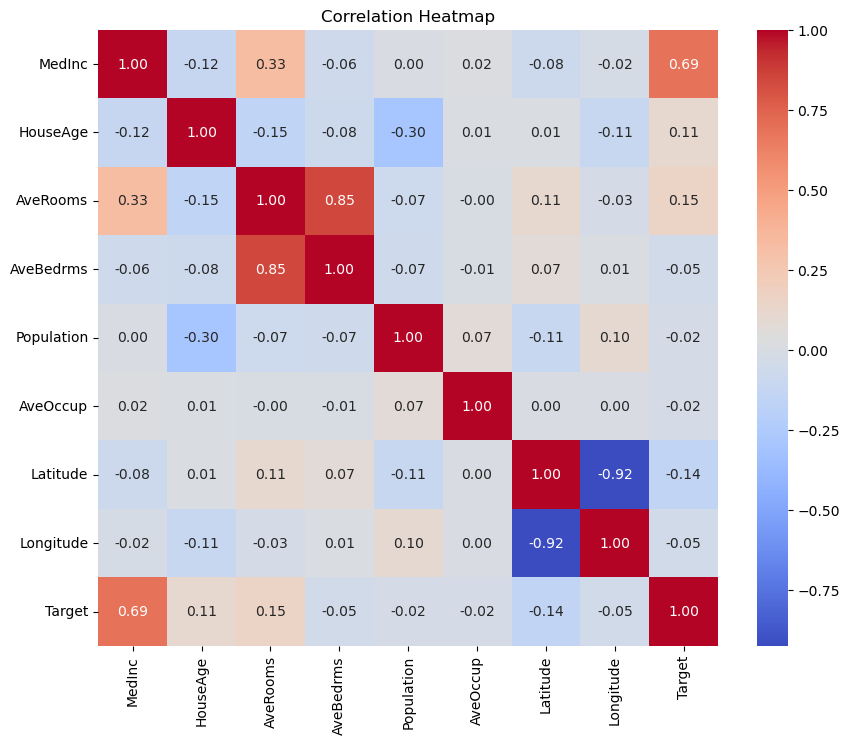

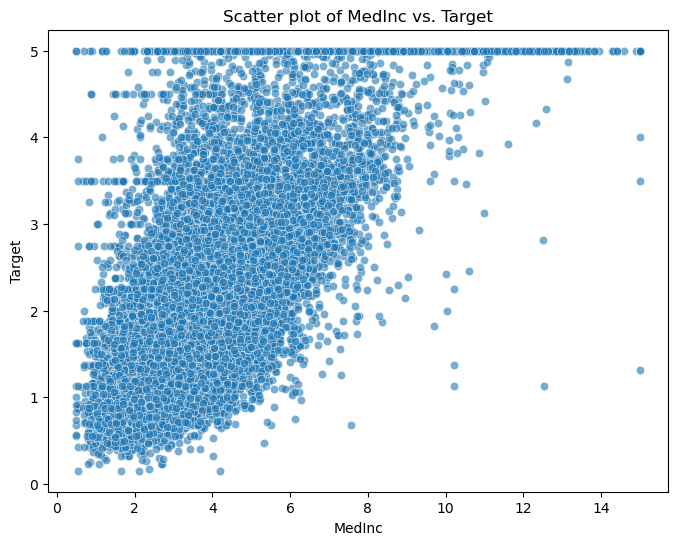

In [8]:
# Data Visualization
# Histograms of the features
plt.figure(figsize=(12, 6))
plt.title("Histograms of Features")
for i, feature in enumerate(feature_names):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Scatter plot of a selected feature against the target
selected_feature = 'MedInc'
plt.figure(figsize=(8, 6))
plt.title(f"Scatter plot of {selected_feature} vs. Target")
sns.scatterplot(data=df, x=selected_feature, y='Target', alpha=0.6)
plt.xlabel(selected_feature)
plt.ylabel('Target')
plt.show()

## Build Neural Network

::: {.callout-tip title="Prompt"}

Use a neural network model to make predictions on the California Housing dataset by following these steps:

1). Load the data from sklearn. Use 20% of data as the testing dataset.  
2). Build a neural network model using Keras with the following structure:
   
- Layer 1 with 64 output features, followed by the ReLU activation function.
  
- Layer 2 with 64 output features, followed by the ReLU activation function.
   
- Layer 3 with 1 output feature.
3). Show the mean absolute error of the predictions on the testing dataset.  
4). Build a linear regression model. Calculate and display the mean absolute error of the predictions on the testing dataset.

:::

Unfortunately, OpenAI does not have an environment to execute neural network code in the backend. However, you can copy the code generated by ChatGPT and run it in Google Colab, or use the Google Colab link associated with this page to execute the code there.

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Load the data and split it into training and testing sets
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the neural network model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 3: Train the neural network model and calculate the mean absolute error on the testing dataset
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the testing dataset
y_pred_nn = model.predict(X_test, verbose=0)

# Calculate mean absolute error for neural network
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

# Step 4: Build the linear regression model and calculate the mean absolute error on the testing dataset
linear_model = LinearRegression()

# Train the linear regression model
linear_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred_linear = linear_model.predict(X_test)

# Calculate mean absolute error for linear regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("Mean Absolute Error (Linear Regression):", mae_linear)

Mean Absolute Error (Neural Network): 0.5177604031294493
Mean Absolute Error (Linear Regression): 0.5332001304956989


## Modeling Techniques

In this section, we will explore various modeling techniques to enhance the performance and robustness of our neural network model.

### Weight Regularization

One common way to address overfitting is to apply weight regularization techniques, which encourage the weights of the network to take on small values. This helps to prevent the network from being too sensitive to the training data and improves its ability to generalize to new data. Weight regularization comes in two flavors: L1 and L2 regularization.

For example, we can easily implement regularization when creating a layer in the neural network:
```python
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
```

Here, we use L2 regularization with a weight of 0.001, where 0.001 is a user-defined parameter or hyperparameter.

### Dropout

Dropout is one of the most effective and commonly used regularization techniques for neural networks.

When applied to a layer, dropout randomly "drops out" (i.e., sets to zero) a number of output features during training. For example, if a given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for an input sample during training, after applying dropout, this vector might have a few zero entries distributed at random, e.g., [0, 0.5, 1.3, 0, 1.1].

The "dropout rate" is the fraction of the features that are zeroed out and is usually set between 0.2 and 0.5.

Dropout processing is only performed during training. At the time of testing or when using the model to make predictions, no units are dropped out. Instead, the layer's output values are scaled down by a factor equal to the dropout rate to account for the fact that more units are active than during training.

To implement dropout, we can simply add a dropout layer between two layers as follows:
```python
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(64, activation='relu'))
```

This technique may seem strange and arbitrary. Why would this help reduce overfitting? The idea was inspired by a fraud prevention mechanism used by banks. In the inventor's own words: "I went to my bank. The tellers kept changing, and I asked one of them why. He said he didn’t know, but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting."

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant (referred to as "conspiracies" in the above example), which the network would start memorizing if no noise was present.

### K-fold Validation

Building a robust neural network model is both an art and a science, requiring substantial experience and numerous experiments. Determining the right hyperparameters, such as regularization weight and dropout rate, is crucial. Even more important is deciding on the model's architecture, including the number of layers and neurons per layer. To make these decisions, we rely on a validation dataset to gauge the model's performance. However, basing our evaluation on a single validation set can lead to biased results. This is where k-fold cross-validation comes into play. K-fold cross-validation allows us to assess our model's performance more reliably by dividing the data into multiple folds, ensuring each part serves as both training and validation data at different stages. This method provides a comprehensive evaluation across different model settings. 

For example, we can use k-fold cross-validation to compare the following model architectures and identify the best one.

- Model 1 is our current model with the following architecture:
```python
# model 1
model = models.Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
```
- Model 2 has 128 neurons in the first layer, which is a hyperparameter:
```python
# model 2
model = models.Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
```
- Model 3 has fewer layers than Model 1:
```python
# model 3
model = models.Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
```
We can use K-fold cross-validation to evaluate the performance of these three models and select the best model structure.

The best practice is to use K-fold cross-validation. It consists of splitting the available data into K partitions (typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the K validation scores obtained.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/res/Neural_Networks/figures/k-fold_valid.png" width="500">
</center>

::: {.callout-caution collapse="false" title="Important Notes"}

It's important to note that once a model is chosen, its parameters need to be trained using the entire training dataset before the model is deployed for use.

:::

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import History
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Load the data and split it into training and testing sets
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the neural network model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 3: Retrain the neural network model using K-fold validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
all_val_maes = []
for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold))
    val_mae = history.history['val_loss']
    all_val_maes.append(val_mae)

# Calculate the average validation MAE for each epoch
average_val_maes = np.mean(all_val_maes, axis=0)

# Plot the average validation MAE along the number of epochs
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(average_val_maes) + 1), average_val_maes)
# plt.title("Average Validation MAE vs. Epochs")
# plt.xlabel("Epochs")
# plt.ylabel("Average Validation MAE")
# plt.grid()
# plt.show()

# Step 4: Make predictions on the testing dataset
y_pred_nn = model.predict(X_test)

# Calculate mean absolute error for neural network
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
Mean Absolute Error (Neural Network): 0.4885285319381213


::: {.callout-caution collapse="false" title="Important Notes"}

To evaluate different models, simply replace the code in Step 2: Build the neural network model with alternative models and select the one with the lowest Mean Absolute Error.

Since the code in Step 3 employs K-fold validation with 5 splits, it may take long time (approximately 10 minutes on Google Colab) to complete the evaluation for each model.

:::